In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# read in csv as df
filepath = "../data/Trips_data (cleaned).csv"

df = pd.read_csv(filepath)

df.head()

,PUMFID,REFYEAR,TRIPID,TRIPTYPE,ROS_Q02A,ROS_Q02B,DISTANCE,DISTLONG,DURATION,DUR_MAIN,...,Beach,Hunting,Golfing,Cycling,Snowmobiling,Downhill Skiing/Snowboarding,Cross-country Skiing/Snowshoeing,Play Sports,Other Activity,No Activities
0,1006690,2022,2,5,2,96,46.0,46.0,0,0,...,False,False,False,False,False,False,False,False,False,False
1,1006690,2022,3,5,2,96,63.0,63.0,0,0,...,False,False,False,False,False,False,False,False,False,False
2,3008513,2022,1,4,2,96,847.0,847.0,76,76,...,False,False,False,False,False,False,False,False,False,False
3,1010819,2022,1,6,2,96,83.0,83.0,15,15,...,False,False,False,False,False,False,False,False,False,False
4,1006697,2022,2,5,2,96,NaN,NaN,0,0,...,False,False,False,False,False,False,False,False,False,False


In [4]:
df.describe()

,PUMFID,REFYEAR,TRIPID,TRIPTYPE,ROS_Q02A,ROS_Q02B,DISTANCE,DISTLONG,DURATION,DUR_MAIN,...,SPD_D11,SPD_D12,Total spending on shopping,SPD_DTOT,VSD1_Q01,VSD1_Q02,LGD_Q01,TRIP_LEG,WPT,WT
count,4.714100e+04,47141.0,47141.000000,47141.000000,47141.000000,47141.000000,41572.000000,41477.000000,47141.000000,47141.000000,...,19711.000000,19831.000000,22507.000000,47141.000000,47141.000000,47141.000000,47141.000000,47141.0,47141.000000,47141.000000
mean,2.615823e+06,2022.0,1.756645,5.141363,1.805626,77.788825,265.722554,265.394918,1.569589,1.569589,...,51.099893,59.041854,96.773848,505.492225,4.134490,88.710379,4.217687,1.0,4589.442255,3064.924379
std,1.002350e+06,0.0,1.149258,0.740889,0.395722,37.091098,506.293531,508.140645,3.822801,3.822801,...,265.569884,285.927562,372.780591,1091.163565,2.096431,25.190022,1.996635,0.0,8800.275788,6274.608960
min,1.006690e+06,2022.0,1.000000,3.000000,1.000000,1.000000,4.000000,4.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,2.000000,1.0,1.068200,0.534100
25%,2.015295e+06,2022.0,1.000000,5.000000,2.000000,96.000000,74.000000,74.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,75.000000,2.000000,96.000000,2.000000,1.0,1112.458000,720.513300
50%,3.012256e+06,2022.0,1.000000,5.000000,2.000000,96.000000,119.000000,119.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,185.000000,6.000000,96.000000,6.000000,1.0,2363.343400,1517.669700
75%,3.031893e+06,2022.0,2.000000,6.000000,2.000000,96.000000,228.000000,228.000000,2.000000,2.000000,...,0.000000,20.000000,80.000000,500.000000,6.000000,96.000000,6.000000,1.0,4889.847700,3142.015200
max,4.034647e+06,2022.0,36.000000,6.000000,2.000000,96.000000,5180.000000,5300.000000,334.000000,334.000000,...,25050.000000,16000.000000,25050.000000,79003.000000,9.000000,99.000000,9.000000,1.0,306469.199400,251601.864500


<Axes: xlabel='SPD_DTOT', ylabel='Count'>

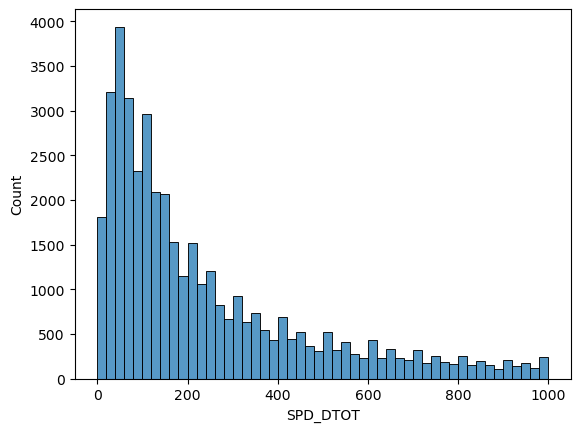

In [4]:
sns.histplot(df['SPD_DTOT'], bins=50, binrange=[0, 1000])

<Axes: xlabel='SPD_D06', ylabel='Count'>

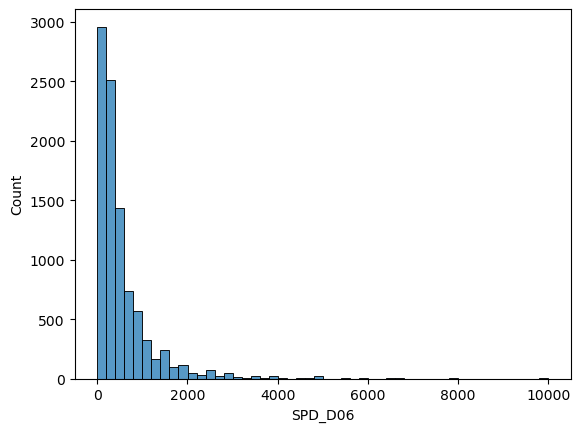

In [6]:
sns.histplot(df['SPD_D06'], bins=50, binrange=[1, 10000])

In [5]:
qp_20 = []
qp_50 = []
qp_100 = []

# create intervals for quantiles at every 1%, 2% and 5% for 100/50/20 quantiles
for i in range(0, 101):
    qp_100.append(0.01*i)
    if (i < 51):
        qp_50.append(0.02*i)
        if (i < 21):
            qp_20.append(0.05*i)

In [6]:
# get 100 quantile values for each type of spending
transport_q100 = df['Total Spending for transport'].quantile(q=qp_100,  interpolation='higher').values
food_q100 = df['Total Spending for food/bevs'].quantile(q=qp_100,  interpolation='higher').values
shopping_q100 = df['Total spending on shopping'].quantile(q=qp_100,  interpolation='higher').values
activities_q100 = df['Total spending for activities/entertainment'].quantile(q=qp_100,  interpolation='higher').values
total_q100 = df['SPD_DTOT'].quantile(q=qp_100,  interpolation='higher').values
accomodations_q100 = df['SPD_D06'].quantile(q=qp_100,  interpolation='higher').values

In [7]:
# get 20 quantile values for each type of spending
transport_q20 = df['Total Spending for transport'].quantile(q=qp_20,  interpolation='higher').values
food_q20 = df['Total Spending for food/bevs'].quantile(q=qp_20,  interpolation='higher').values
shopping_q20 = df['Total spending on shopping'].quantile(q=qp_20,  interpolation='higher').values
activities_q20 = df['Total spending for activities/entertainment'].quantile(q=qp_20,  interpolation='higher').values
total_q20 = df['SPD_DTOT'].quantile(q=qp_20,  interpolation='higher').values
accomodations_q20 = df['SPD_D06'].quantile(q=qp_20,  interpolation='higher').values

In [8]:
# get 50 quantile values for each type of spending
transport_q50 = df['Total Spending for transport'].quantile(q=qp_50,  interpolation='higher').values
food_q50 = df['Total Spending for food/bevs'].quantile(q=qp_50,  interpolation='higher').values
shopping_q50 = df['Total spending on shopping'].quantile(q=qp_50,  interpolation='higher').values
activities_q50 = df['Total spending for activities/entertainment'].quantile(q=qp_50,  interpolation='higher').values
total_q50 = df['SPD_DTOT'].quantile(q=qp_50,  interpolation='higher').values
accomodations_q50 = df['SPD_D06'].quantile(q=qp_50,  interpolation='higher').values

In [9]:
total_q20n = []
total_q50n = []
total_q100n = []
transport_q20n = []
transport_q50n = []
transport_q100n = []
food_q20n = []
food_q50n = []
food_q100n = []
shopping_q20n = []
shopping_q50n = []
shopping_q100n = []
activities_q20n = []
activities_q50n = []
activities_q100n = []
accomodations_q20n = []
accomodations_q50n = []
accomodations_q100n = []
# create lists for quantile names


# for every number from 1 to 100
for i in range(0, 100):
    # if ith quantile is not equal to next quantile, add new bin name for this quantile
    if (total_q100[i] != total_q100[i+1]) :
        total_q100n.append("$" + str(total_q100[i]) + "-$" + str(total_q100[i+1]))
    if (transport_q100[i] != transport_q100[i+1]) :
        transport_q100n.append("$" + str(transport_q100[i]) + "-$" + str(transport_q100[i+1]))
    if (food_q100[i] != food_q100[i+1]) :
        food_q100n.append("$" + str(food_q100[i]) + "-$" + str(food_q100[i+1]))
    if (shopping_q100[i] != shopping_q100[i+1]) :
        shopping_q100n.append("$" + str(shopping_q100[i]) + "-$" + str(shopping_q100[i+1]))
    if (activities_q100[i] != activities_q100[i+1]) :
        activities_q100n.append("$" + str(activities_q100[i]) + "-$" + str(activities_q100[i+1]))
    if (accomodations_q100[i] != accomodations_q100[i+1]) :
        accomodations_q100n.append("$" + str(accomodations_q100[i]) + "-$" + str(accomodations_q100[i+1]))

    # if it is within the first 50
    if (i < 50):
        # if ith quantile is not equal to next quantile, add new bin name for this quantile
        if (total_q50[i] != total_q50[i+1]) :
            total_q50n.append("$" + str(total_q50[i]) + "-$" + str(total_q50[i+1]))
        if (transport_q50[i] != transport_q50[i+1]) :
            transport_q50n.append("$" + str(transport_q50[i]) + "-$" + str(transport_q50[i+1]))
        if (food_q50[i] != food_q50[i+1]) :
            food_q50n.append("$" + str(food_q50[i]) + "-$" + str(food_q50[i+1]))
        if (shopping_q50[i] != shopping_q50[i+1]) :
            shopping_q50n.append("$" + str(shopping_q50[i]) + "-$" + str(shopping_q50[i+1]))
        if (activities_q50[i] != activities_q50[i+1]) :
            activities_q50n.append("$" + str(activities_q50[i]) + "-$" + str(activities_q50[i+1]))
        if (accomodations_q50[i] != accomodations_q50[i+1]) :
            accomodations_q50n.append("$" + str(accomodations_q50[i]) + "-$" + str(accomodations_q50[i+1]))
        
        # if it is within the first 20
        if (i < 20):
            # if ith quantile is not equal to next quantile, add new bin name for this quantile
            if (total_q20[i] != total_q20[i+1]) :
                total_q20n.append("$" + str(total_q20[i]) + "-$" + str(total_q20[i+1]))
            if (transport_q20[i] != transport_q20[i+1]) :
                transport_q20n.append("$" + str(transport_q20[i]) + "-$" + str(transport_q20[i+1]))
            if (food_q20[i] != food_q20[i+1]) :
                food_q20n.append("$" + str(food_q20[i]) + "-$" + str(food_q20[i+1]))
            if (shopping_q20[i] != shopping_q20[i+1]) :
                shopping_q20n.append("$" + str(shopping_q20[i]) + "-$" + str(shopping_q20[i+1]))
            if (activities_q20[i] != activities_q20[i+1]) :
                activities_q20n.append("$" + str(activities_q20[i]) + "-$" + str(activities_q20[i+1]))
            if (accomodations_q20[i] != accomodations_q20[i+1]) :
                accomodations_q20n.append("$" + str(accomodations_q20[i]) + "-$" + str(accomodations_q20[i+1]))

In [12]:
# bin values by quantiles with names for bins
df['Total Bins (20)'] = pd.cut(df['SPD_DTOT'], total_q20, labels=total_q20n, duplicates='drop', include_lowest=True)
df['Total Bins (50)'] = pd.cut(df['SPD_DTOT'], total_q50, labels=total_q50n, duplicates='drop', include_lowest=True)
df['Total Bins (100)'] = pd.cut(df['SPD_DTOT'], total_q100, labels=total_q100n, duplicates='drop', include_lowest=True)

df['Transport Bins (20)'] = pd.cut(df['Total Spending for transport'], transport_q20, labels=transport_q20n, duplicates='drop', include_lowest=True)
df['Transport Bins (50)'] = pd.cut(df['Total Spending for transport'], transport_q50, labels=transport_q50n, duplicates='drop', include_lowest=True)
df['Transport Bins (100)'] = pd.cut(df['Total Spending for transport'], transport_q100, labels=transport_q100n, duplicates='drop', include_lowest=True)

df['Food Bins (20)'] = pd.cut(df['Total Spending for food/bevs'], food_q20, labels=food_q20n, duplicates='drop', include_lowest=True)
df['Food Bins (50)'] = pd.cut(df['Total Spending for food/bevs'], food_q50, labels=food_q50n, duplicates='drop', include_lowest=True)
df['Food Bins (100)'] = pd.cut(df['Total Spending for food/bevs'], food_q100, labels=food_q100n, duplicates='drop', include_lowest=True)

df['Shopping Bins (20)'] = pd.cut(df['Total spending on shopping'], shopping_q20, labels=shopping_q20n, duplicates='drop', include_lowest=True)
df['Shopping Bins (50)'] = pd.cut(df['Total spending on shopping'], shopping_q50, labels=shopping_q50n, duplicates='drop', include_lowest=True)
df['Shopping Bins (100)'] = pd.cut(df['Total spending on shopping'], shopping_q100, labels=shopping_q100n, duplicates='drop', include_lowest=True)

df['Activities Bins (20)'] = pd.cut(df['Total spending for activities/entertainment'], activities_q20, labels=activities_q20n, duplicates='drop', include_lowest=True)
df['Activities Bins (50)'] = pd.cut(df['Total spending for activities/entertainment'], activities_q50, labels=activities_q50n, duplicates='drop', include_lowest=True)
df['Activities Bins (100)'] = pd.cut(df['Total spending for activities/entertainment'], activities_q100, labels=activities_q100n, duplicates='drop', include_lowest=True)

df['Accomodations Bins (20)'] = pd.cut(df['SPD_D06'], accomodations_q20, labels=accomodations_q20n, duplicates='drop', include_lowest=True)
df['Accomodations Bins (50)'] = pd.cut(df['SPD_D06'], accomodations_q50, labels=accomodations_q50n, duplicates='drop', include_lowest=True)
df['Accomodations Bins (100)'] = pd.cut(df['SPD_D06'], accomodations_q100, labels=accomodations_q100n, duplicates='drop', include_lowest=True)

<Axes: xlabel='Shopping Bins (20)', ylabel='Count'>

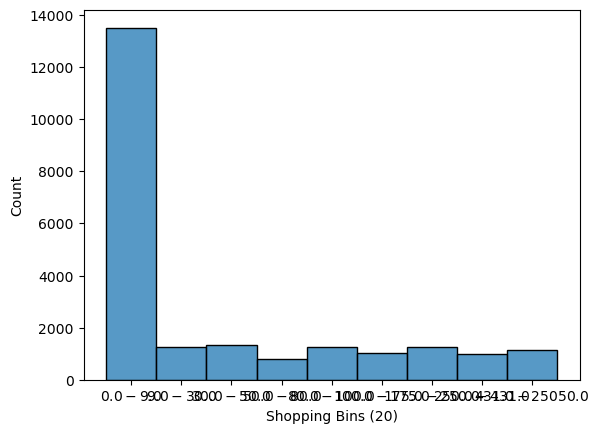

In [16]:
sns.histplot(df['Shopping Bins (20)'])

In [10]:
total_q20n

['$0-$20',
 '$20-$35',
 '$35-$50',
 '$50-$60',
 '$60-$75',
 '$75-$95',
 '$95-$110',
 '$110-$130',
 '$130-$150',
 '$150-$185',
 '$185-$220',
 '$220-$265',
 '$265-$322',
 '$322-$400',
 '$400-$500',
 '$500-$650',
 '$650-$862',
 '$862-$1225',
 '$1225-$2024',
 '$2024-$79003']

In [19]:
final_write_path = "../data/Binned Data.csv"

df.to_csv(final_write_path, index=False)